In [2]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
import math as math
from numpy.fft import fft, ifft, fftfreq
from numpy import exp, pi, sqrt, linspace
from math import factorial
from scipy.special import hermite

In [3]:
# Spatial grid
L, J = 10, 512

x_pts, dx = np.linspace(-L/2, L/2, J, retstep=True)

print("x_pts[:11]=",x_pts[:11])
print("x_pts[J-10:]",x_pts[J-10:])

x_pts[:11]= [-5.         -4.98043053 -4.96086106 -4.94129159 -4.92172211 -4.90215264
 -4.88258317 -4.8630137  -4.84344423 -4.82387476 -4.80430528]
x_pts[J-10:] [ 4.82387476  4.84344423  4.8630137   4.88258317  4.90215264  4.92172211
  4.94129159  4.96086106  4.98043053  5.        ]


In [4]:
# temporal grid
T, N = 200, 100001
t_pts, dt = np.linspace(0., T, N, retstep=True)
print((t_pts[:]))
print(dt,dx)

[  0.00000000e+00   2.00000000e-03   4.00000000e-03 ...,   1.99996000e+02
   1.99998000e+02   2.00000000e+02]
0.002 0.0195694716243


Let us define $\sigma \equiv \frac{DΔt}{2Δx^2}$

In [5]:
#def functions f_conjugate and f_v 
def f_conj(Psi):
    f_conj = np.conjugate(Psi) * Psi
    return abs(f_conj)

def f_v(x_pts, V):
    f_v= (x_pts) * (x_pts) * (V)
    return f_v




    



<IPython.core.display.Javascript object>


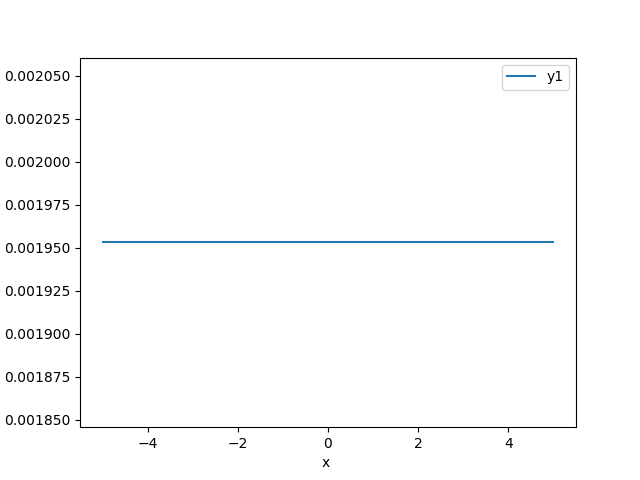

<IPython.core.display.Javascript object>


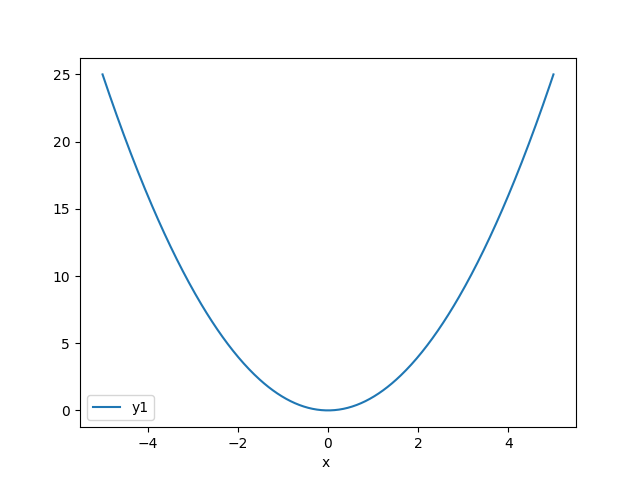

In [6]:
# plot function

def plot_1solution(x, y1):
    fig, ax= plt.subplots()
    
    ax.plot(x, y1, label='y1')
    
    ax.set_xlabel('x ') 
    #ax.set_ylabel('|u(x,t)|**2')
   # ax.set_title('$\(U**2)$')
    ax.legend()
    fig.show()

# test de f_conj et f_v
def u_test(x):
    u_test= (np.cos(x) + 1j*np.sin(x))
    u_test /= (np.linalg.norm(u_test))
    return u_test

# def gaussian and quantum harmonic oscillator
def gaussian(x, w=1):
    return exp(-x**2 / w**2) + 0j

def QHO(n, x_pts, xshift=0, t=0):
    E= n + 0,5
    coef = 1 / sqrt(2**n * factorial(n)) * (1 / pi)**(1/4)
    hermite1 = hermite(n)
    xs = x_pts- xshift
    dx = x_pts[1]-x_pts[0]
    
    a= coef * exp(-xs**2 / 2+1j*t) * hermite1(x_pts) 
    return a / sqrt(sum(f_conj(a))*dx)


y1= f_conj(u_test(x_pts))
plot_1solution(x_pts, y1)



y2= f_v(x_pts, 1)
plot_1solution(x_pts, y2)


In [7]:
' we define T_op, V_op V, and  k, eta without losses' 

V=1
eta=1
k = 2 * pi * fftfreq(len(x_pts), d=dx)

def initiate_op(x_pts, dx, k, dt, V):
   T_op = exp(-1j * k**2 * dt / 2)
   V_op = exp(-1j * f_v(x_pts, V) * dt / 2)
   
   return  T_op, V_op


'We define functions to apply the split step method'


def linear_step(Psi, V_op, dt, dx, x_pts, T_op):
    
    # kinetic
    Psi[:] = ifft(fft(Psi) * T_op)
    
    # potential
    Psi = Psi * V_op
    
    return Psi

def nonlinear_step(Psi, V_op, dt, dx, x_pts, T_op, eta):
    

   # linear step
   Psi_k = linear_step(Psi, V_op, dt, dx, x_pts, T_op)

   # nonlinear
   Psi_k *= exp(-1j * eta * abs(Psi_k)**2 * dt)
  
   return Psi_k


#Psi=u_test(x_pts,L)


#nonlinear_step(Psi,V_op,dt,dx,x_pts,T_op,eta)
    



In [8]:
# we iterate the process 
def N_steps_non_linear(Psi_0, dt, dx, x_pts, k, Psi_rec, N, eta):
    Psi = Psi_0.copy()
    Psi_rec.append(Psi)
    # initiate the operators
    T_op, V_op = initiate_op(x_pts, dx, k, dt, V)
    
    for i in range (1,N):
        Psi_new = nonlinear_step(Psi, V_op, dt, dx, x_pts, T_op, eta)
        Psi = Psi_new.copy()
        Psi_rec.append(Psi)
        
    return Psi_rec


        

In [9]:
# Test the function V=1
Psi_rec = []
Psi_0 = gaussian(x_pts)
N_0 = 10000
Psi_rec = N_steps_non_linear(Psi_0, dt, dx, x_pts, k, Psi_rec, N_0, eta)
print (Psi_rec[-1])


[  6.01435463e-03 -2.06026271e-03j   6.01502046e-03 -2.05365069e-03j
   6.01630110e-03 -2.04253124e-03j   6.01728944e-03 -2.02352823e-03j
   6.01875361e-03 -2.00092487e-03j   6.01870823e-03 -1.96989205e-03j
   6.01832737e-03 -1.93395154e-03j   6.01688038e-03 -1.89098633e-03j
   6.01415131e-03 -1.84071434e-03j   6.01082314e-03 -1.78546127e-03j
   6.00526436e-03 -1.72094016e-03j   5.99926530e-03 -1.65165921e-03j
   5.99192747e-03 -1.57363830e-03j   5.98355940e-03 -1.48972785e-03j
   5.97409789e-03 -1.39831940e-03j   5.96399985e-03 -1.29925077e-03j
   5.95389349e-03 -1.19474581e-03j   5.94298515e-03 -1.08125703e-03j
   5.93285854e-03 -9.63373771e-04j   5.92257192e-03 -8.36694874e-04j
   5.91392395e-03 -7.05082164e-04j   5.90659957e-03 -5.67308598e-04j
   5.90042159e-03 -4.22627686e-04j   5.89743557e-03 -2.74294849e-04j
   5.89681149e-03 -1.18787958e-04j   5.90001240e-03 +3.91669044e-05j
   5.90664236e-03 +2.03104737e-04j   5.91806349e-03 +3.69722034e-04j
   5.93460105e-03 +5.39669830e-04j

<IPython.core.display.Javascript object>


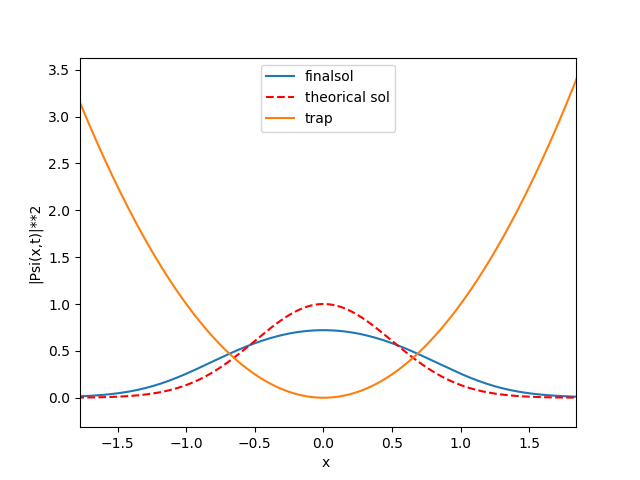

In [12]:
# Graphic Treatment

def plot_3solution(x, y1, y2, y3):
    fig, ax = plt.subplots()
    
    ax.plot(x, y1, label='finalsol')
    ax.plot(x, y2, 'r--', label='theorical sol')
    ax.plot(x, y3, label='trap')
    ax.set_xlabel('x ') 
    ax.set_ylabel('|Psi(x,t)|**2')
   # ax.set_title('$\(U**2)$')
    ax.legend()
    fig.show()
    
trap = f_v(x_pts, V)
sol = f_conj(Psi_rec[-1])
sol_i = f_conj(Psi_0)
plot_3solution(x_pts, sol, sol_i, trap)



In [13]:
# Find Ground State: we have to normalize after each iteration 

def nonlinear_step_normalized(Psi, V_op, dt, dx, x_pts, T_op, eta):
    Psi_gi = nonlinear_step(Psi, V_op, dt, dx, x_pts, T_op, eta)
    Psi_g = Psi_gi / sqrt((sum(f_conj(Psi_gi)*dx)))
    
    return Psi_g

def N_nonlinear_steps_normalized(Psi_0, dt, dx, x_pts, k, Psi_rec, N, eta):
    Psi = Psi_0.copy()
    Psi_rec.append(Psi)
    # We initiate the operators
    T_op, V_op = initiate_op(x_pts, dx, k, dt, V)
    
    for i in range (1,N):
        Psi_new = nonlinear_step_normalized(Psi, V_op, dt, dx, x_pts, T_op, eta)
        Psi = Psi_new.copy()
        Psi_rec.append(Psi)
        
    return Psi_rec
                   


In [14]:
# Calculate the groundstate
Psig_rec = []

Psig_rec = N_nonlinear_steps_normalized(Psi_0, -1j*dt, dx, x_pts, k, Psig_rec, N_0, 0)
                   


<IPython.core.display.Javascript object>


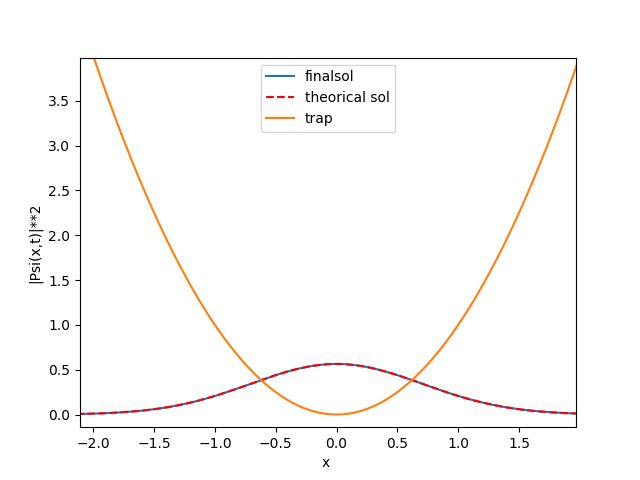

<IPython.core.display.Javascript object>


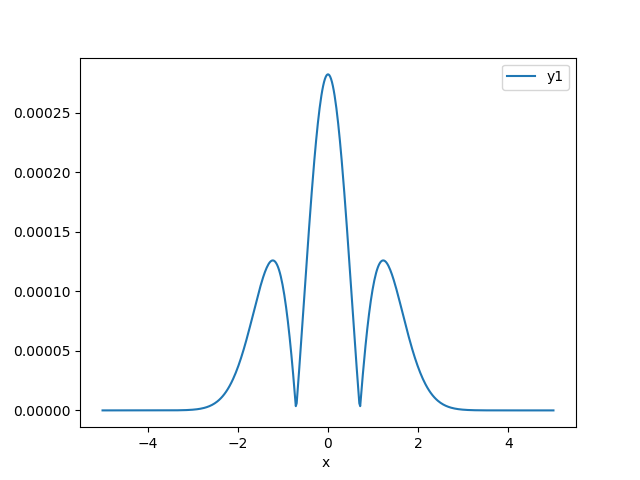

<IPython.core.display.Javascript object>


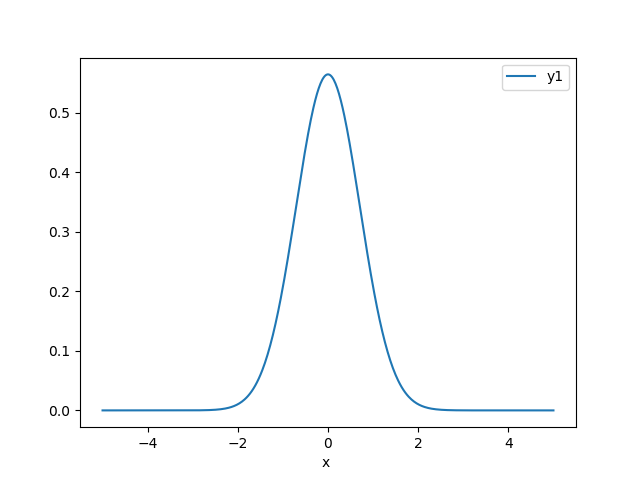

In [15]:
# Print the result

sol_g = f_conj(Psig_rec[-1])
sol_th = f_conj(QHO(0, x_pts, xshift=0, t=0))
plot_3solution(x_pts, sol_g, sol_th, trap)
plot_1solution(x_pts, abs(sol_g-sol_th))
plot_1solution(x_pts, sol_th)